In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as style
import pandas as pd
import pandas_datareader.data as web
import investpy as inv

In [18]:
start = "2/4/2020"
end = "21/11/2021"
mex = inv.currency_crosses.get_currency_cross_historical_data(currency_cross="USD/MXN",from_date=start,to_date=end,interval = "Weekly")
bra = inv.currency_crosses.get_currency_cross_historical_data(currency_cross="USD/BRL",from_date=start,to_date=end,interval = "Weekly")
#arg = inv.currency_crosses.get_currency_cross_historical_data(currency_cross="USD/ARS",from_date=start,to_date=end,interval = "Weekly")
col = inv.currency_crosses.get_currency_cross_historical_data(currency_cross="USD/COP",from_date=start,to_date=end,interval = "Weekly")
ch = inv.currency_crosses.get_currency_cross_historical_data(currency_cross="USD/CLP",from_date=start,to_date=end,interval = "Weekly")

In [28]:
pairs = pd.concat([mex["Close"],bra["Close"],col["Close"],ch["Close"]],axis=1)
pairs.columns = ["Peso Mexicano", "Real Brasileño", "Peso Colombiano", "Peso Chileno"]

In [29]:
pairs.tail()

,Peso Mexicano,Real Brasileño,Peso Colombiano,Peso Chileno
Date,,,,
2021-10-24,20.5450,5.6372,3757.53,813.20
2021-10-31,20.3170,5.5428,3870.03,811.05
2021-11-07,20.5090,5.4588,3880.33,799.95
2021-11-14,20.8240,5.6135,3908.23,828.05
2021-11-21,21.0144,5.5930,3923.99,811.59


In [30]:
returns = pairs.pct_change()[1:]
returns.head()

,Peso Mexicano,Real Brasileño,Peso Colombiano,Peso Chileno
Date,,,,
2020-04-12,0.014514,0.025554,0.028547,0.014108
2020-04-19,0.053768,0.067630,0.027120,0.004688
2020-04-26,-0.016346,-0.018850,-0.020777,-0.026305
2020-05-03,-0.037155,0.044986,-0.016671,-0.010663
2020-05-10,0.011546,0.021647,0.004696,0.002240


In [31]:
cumulative_return = ((returns+1).cumprod()-1)*100

In [32]:
cumulative_return.head()

,Peso Mexicano,Real Brasileño,Peso Colombiano,Peso Chileno
Date,,,,
2020-04-12,1.451433,2.555416,2.854716,1.410778
2020-04-19,6.906290,9.491267,5.644108,1.886187
2020-04-26,5.158751,7.427352,3.449177,-0.793934
2020-05-03,1.251605,12.260124,1.724588,-1.851720
2020-05-10,2.420625,14.690217,2.202247,-1.631843


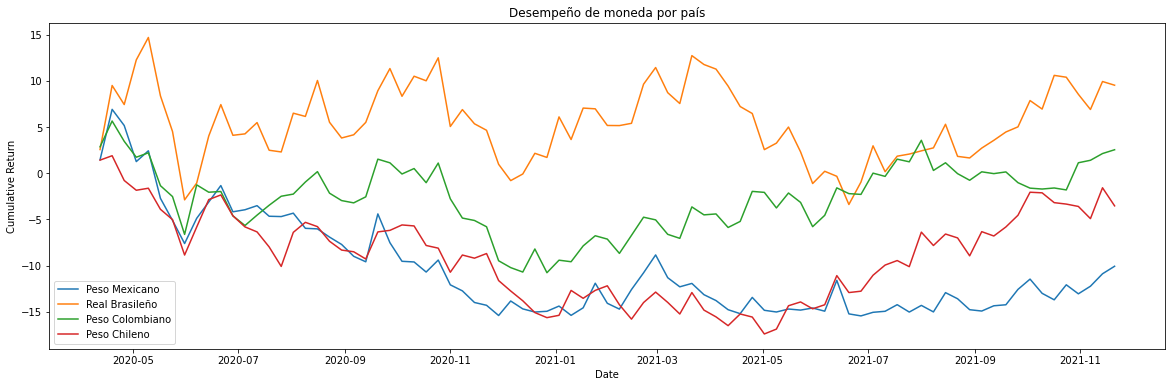

In [38]:
plt.figure(figsize=(20,6))
plt.plot(cumulative_return)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(pairs.columns)
plt.title("Desempeño de moneda por país")
plt.show()

In [34]:
cumulative_return.iloc[-1]

Peso Mexicano     -10.079589
Real Brasileño      9.520639
Peso Colombiano     2.534361
Peso Chileno       -3.540612
Name: 2021-11-21 00:00:00, dtype: float64